### Question 1: What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to understand and model the relationship between two continuous variables.
 - It uses one variable, called the independent variable (X), to predict another variable, called the dependent variable (Y).
 - The goal is to find the "best-fitting" straight line (represented by the equation Y = mX + c) that describes how Y changes when X changes.
 - For example, we could use it to predict a student's exam score (Y) based on the number of hours they studied (X).

---

### Question 2: What are the key assumptions of Simple Linear Regression?

For a Simple Linear Regression model to be accurate and reliable, it relies on a few key assumptions:
 - Linearity: The relationship between the independent variable (X) and the dependent variable (Y) must be linear. If we plot the data, it should look like it generally follows a straight line.
 - Independence: The observations (or more specifically, their errors) must be independent of one another. This means one data point's outcome doesn't influence another's. (This is often a concern with time-series data).
 - Homoscedasticity: The variance of the errors (the difference between the actual Y and the predicted Y) should be the same for all values of X. In a plot, this looks like a random scatter of points. The opposite is heteroscedasticity, which might look like a fanning-out "cone" shape.
 - Normality of Errors: The errors of the model are assumed to be normally distributed (follow a bell curve).

---

### Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Heteroscedasticity is the opposite of homoscedasticity. It occurs when the "scatter" (variance) of the model's errors is not constant across different levels of the independent variables. For example, our model might be very accurate at predicting low house prices but very inaccurate (with a wide range of errors) when predicting high house prices.

Heteroscedasticity is a serious problem because it makes the model's standard errors unreliable. This, in turn, makes our p-values and confidence intervals misleading. We might incorrectly conclude that a variable is statistically significant when it isn't, or vice-versa. While the model's predictions might still be unbiased (correct on average), our ability to trust its statistical significance is compromised

---

### Question 4: What is Multiple Linear Regression?

Multiple Linear Regression is an extension of Simple Linear Regression. Instead of using just one independent variable, it uses two or more independent variables (X1, X2, X3, etc.) to predict a single dependent variable (Y).

For example, instead of just using "hours studied" to predict an "exam score," we could use "hours studied," "previous GPA," and "number of classes missed" all together to get a more accurate prediction.

---

### Question 5: What is polynomial regression, and how does it differ from linear regression?

Polynomial regression is a technique used when the relationship between the variables is curved (non-linear). It models the relationship as an nth-degree polynomial (e.g., Y = b0 + b1X + b2X²).

 - Linear Regression fits a straight line (or a flat plane, in the case of multiple regression).
 - Polynomial Regression fits a curved line.
 - It does this by creating new features from the original independent variable (e.g., X², X³) and then fitting a standard linear regression model to this expanded set of features.

---

#### Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data: 
● X = [1, 2, 3, 4, 5] 

● Y = [2.1, 4.3, 6.1, 7.9, 10.2] 

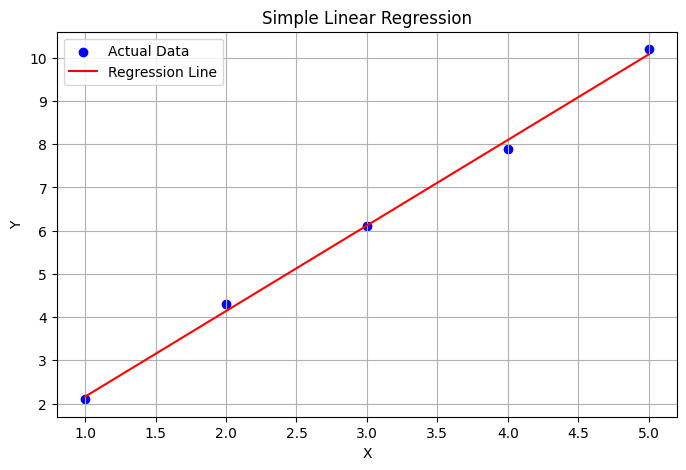

Model Intercept (c): 0.17999999999999794
Model Slope (m): 1.9800000000000004


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Define the sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# 2. Reshape X for scikit-learn
# The model expects a 2D array for the features
X_reshaped = X.reshape(-1, 1)

# 3. Create and fit the model
model = LinearRegression()
model.fit(X_reshaped, Y)

# 4. Get the predictions from the model
Y_pred = model.predict(X_reshaped)

# 5. Plot the results
plt.figure(figsize=(8, 5))
# Plot the original data points
plt.scatter(X, Y, color='blue', label='Actual Data')
# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print model coefficients
print(f"Model Intercept (c): {model.intercept_}")
print(f"Model Slope (m): {model.coef_[0]}")

---

### Question 7: Fit a Multiple Linear Regression model on this sample data: 

● Area = [1200, 1500, 1800, 2000] 

● Rooms = [2, 3, 3, 4] 

● Price = [250000, 300000, 320000, 370000]

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1. Define the sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# 2. Separate features (X) and target (y)
X = df[['Area', 'Rooms']]
y = df['Price']

# 3. Fit the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

print(f"Model Intercept: {mlr_model.intercept_}")
print(f"Model Coefficients (Area, Rooms): {mlr_model.coef_}")
print("---" * 10)

# 4. Check for Multicollinearity using VIF
# We add a constant (intercept) to X for the statsmodels VIF calculation
X_with_const = sm.add_constant(X)

# 5. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Model Intercept: 103157.89473684214
Model Coefficients (Area, Rooms): [   63.15789474 34736.84210526]
------------------------------
Variance Inflation Factor (VIF):
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


**VIF Interpretation**: A common rule of thumb is that a VIF score above 5 or 10 indicates high multicollinearity. Here, the VIF scores for 'Area' and 'Rooms' are both 1.66, which is very low. This means there is no significant multicollinearity between the 'Area' and 'Rooms' variables in this small dataset.

---

### Question 8:  Implement polynomial regression on the following data: 

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7] 

Fit a 2nd-degree polynomial and plot the resulting curve

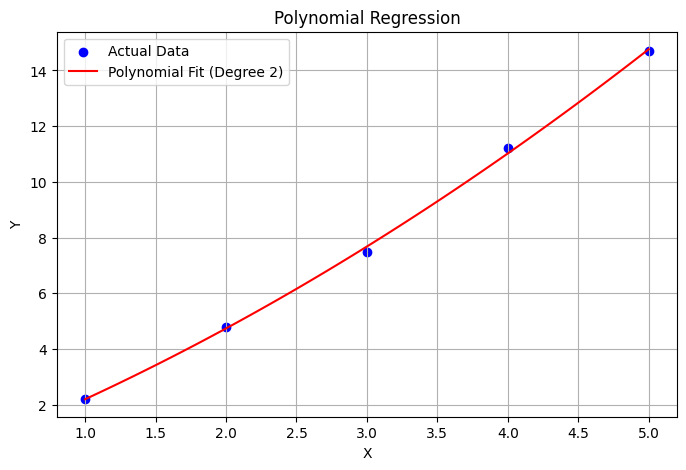

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 1. Define the sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Reshape X to be a 2D array
X_reshaped = X.reshape(-1, 1)

# 2. Create polynomial features (degree 2)
# This will transform [X] into [1, X, X^2]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_reshaped)

# 3. Fit a Linear Regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

# 4. To plot a smooth curve, generate new X values
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# Transform these new X values using the same polynomial features
X_plot_poly = poly.transform(X_plot)
# Get predictions for the smooth curve
Y_plot_pred = poly_model.predict(X_plot_poly)

# 5. Plot the results
plt.figure(figsize=(8, 5))
# Plot the original data points
plt.scatter(X, Y, color='blue', label='Actual Data')
# Plot the polynomial regression curve
plt.plot(X_plot, Y_plot_pred, color='red', label='Polynomial Fit (Degree 2)')

plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

---

### Question 9: Create a residuals plot for a regression model trained on this data: 

● X = [10, 20, 30, 40, 50] 

● Y = [15, 35, 40, 50, 65]

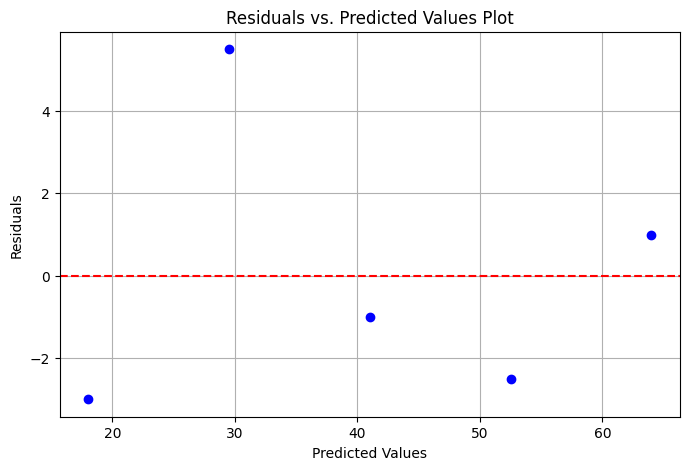

Predicted Values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Define the data
X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])

# Reshape X
X_reshaped = X.reshape(-1, 1)

# 2. Fit a simple linear regression model
model = LinearRegression()
model.fit(X_reshaped, Y)

# 3. Get the predictions
Y_pred = model.predict(X_reshaped)

# 4. Calculate the residuals
# Residuals = Actual Y - Predicted Y
residuals = Y - Y_pred

# 5. Create the residuals plot
plt.figure(figsize=(8, 5))
# Plot predicted values (x-axis) vs. residuals (y-axis)
plt.scatter(Y_pred, residuals, color='blue')
# Add a horizontal line at y=0 (the baseline)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuals vs. Predicted Values Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

print(f"Predicted Values: {np.round(Y_pred, 2)}")
print(f"Residuals: {np.round(residuals, 2)}")

**Assessment of Heteroscedasticity**: By examining the plot, the residuals (the blue dots) seem to be randomly scattered around the red zero line. There is no clear, systematic pattern like a "cone" or "fanning-out" shape. The spread of the residuals looks fairly constant as the predicted values increase.

**Conclusion**: Based on this plot, there is no clear evidence of heteroscedasticity in this model. The assumption of homoscedasticity appears to be met.

---

### Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

**Steps to Address Heteroscedasticity**

This problem (uneven error variance) primarily affects the reliability of our p-values and confidence intervals.

1. Transform the Dependent Variable (Y): This is the most common and often simplest fix. Since we are predicting Price, which is often skewed, taking the logarithm of the price (e.g., log(Price)) can compress the scale. This often stabilizes the variance and makes the errors more evenly distributed.

2. Use Weighted Least Squares (WLS): Instead of standard regression (which treats all data points equally), WLS gives less weight to the observations that come from a region of high variance. This forces the model to pay more attention to the more reliable, less scattered data points.

3. Use Robust Standard Errors: If transformations don't work or are not desired, I can still use the original model but compute "heteroscedasticity-consistent standard errors" (often called "robust standard errors"). This doesn't fix the heteroscedasticity, but it corrects the p-values and confidence intervals to be reliable again.

**Steps to Address Multicollinearity**

This problem (independent variables like Area and Rooms being highly correlated) inflates the variance of the model's coefficients, making them unstable and hard to interpret.

1. Remove One of the Correlated Variables: This is the simplest solution. If Area and Number of Rooms are very highly correlated (e.g., VIF > 10), they are essentially telling the model the same information. I would likely remove Number of Rooms because Area is probably a more precise and fundamental predictor of price.

2. Combine the Variables (Feature Engineering): I could create a new, single feature that combines the correlated ones. For example, if I had "number of bedrooms" and "number of bathrooms," I could combine them into a Total_Rooms feature.

3. Use Regularization Techniques: Methods like Ridge Regression (L2) are specifically designed to handle multicollinearity. Ridge regression adds a penalty to the model that shrinks the coefficients of correlated features, making the model more stable and reliable.